Peak times: [0.0002 0.0066 0.0136 0.0204 0.0272 0.0342 0.0408 0.0476 0.0544 0.0616
 0.068  0.0752 0.0814 0.0884 0.0948 0.1024 0.1086 0.1158 0.1296]
Peak values: [1.1125  0.85    0.675   0.55    0.5     0.43125 0.39375 0.35625 0.3
 0.25625 0.25    0.21875 0.2125  0.2     0.175   0.15625 0.15625 0.1375
 0.125  ]
19
m = 0.7859220964392828 +- 0.018679506185188884 V
n = 63.3536121320207 +- 1.348528551013588 ms
Chi2       = 93.16570929012241
dof        = 17
Chi2_red   = 5.480335840595436


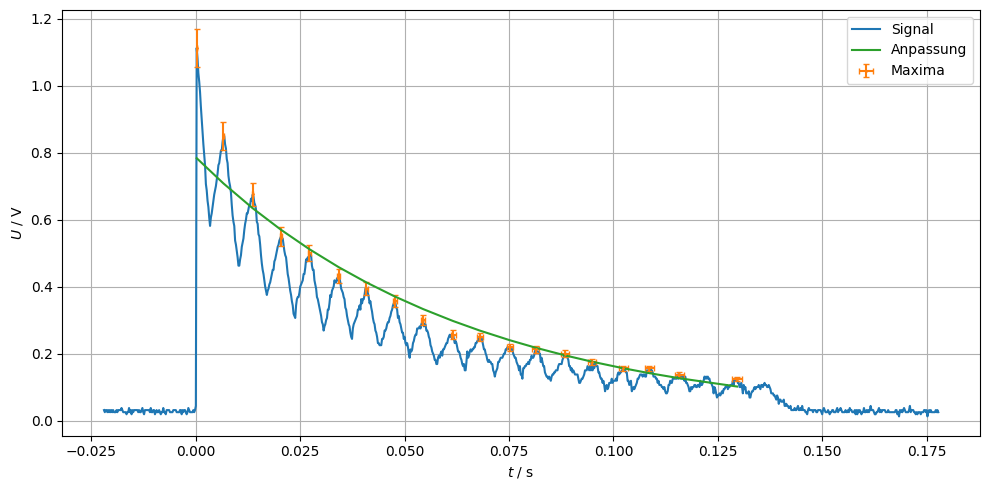

In [1]:
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

# Load your data
data = np.loadtxt("../data/print_004.csv", delimiter=",", skiprows=2)
t = data[:,0]
V = data[:,1]

# Find peaks
peaks, properties = find_peaks(V, prominence=0.05, distance=20)

# Extract peak positions
t_peaks = t[peaks]
V_peaks = V[peaks]

# trimmed
#t_peaks = t_peaks[2:]
#V_peaks = V_peaks[2:]

print("Peak times:", t_peaks)
print("Peak values:", V_peaks)

dt_peaks=0.01*abs(t_peaks)
#dU=0.02*abs(U)
#dtau = [0.1]*len(tau)
#dV_peaks = [0.02]*len(V_peaks)
dV_peaks = 0.05*V_peaks
print(len(t_peaks))

def f(x,m,n):
    return m*(np.exp(-x/n))

#guess=[max(V_peaks),20.0]
#guess=[max(V_peaks), (t_peaks[-1] - t_peaks[0]) / 2]
guess = [V_peaks[0], (t_peaks[-1] - t_peaks[0]) / 3]

popt, pcov=curve_fit(f,t_peaks,V_peaks,p0=guess,sigma=dV_peaks,absolute_sigma=True)
perr=np.sqrt(np.diag(pcov))

print("m =", popt[0], "+-", perr[0], "V")
print("n =", popt[1]*10**3, "+-", perr[1]*10**3, "ms")
#print('a =', popt[2], "+-", perr[2])
# compute chi-square
chi2 = np.sum(((V_peaks - f(t_peaks, *popt)) / dV_peaks)**2)

# degrees of freedom = number of data points - number of parameters
dof = len(t_peaks) - len(popt)

chi2_red = chi2 / dof

print("Chi2       =", chi2)
print("dof        =", dof)
print("Chi2_red   =", chi2_red)

# Plot to verify
plt.figure(figsize=(10,5))
plt.plot(t, V, label="Signal")
plt.errorbar(t_peaks, V_peaks,xerr=dt_peaks, yerr=dV_peaks,fmt='.', capsize=2,markersize=2, label="Maxima")
plt.plot(t_peaks,f(t_peaks,*popt), zorder=2, label='Anpassung')
plt.grid(which='minor')
plt.grid(which='major')
plt.xlabel(r'$t$ / s')
plt.ylabel(r'$U$ / V')
plt.tight_layout()
plt.legend()
plt.savefig('../plots/meiboom_gill.pdf')
plt.show()


In [2]:
# dataframe
df = pd.DataFrame({
    r'$\tau$':t_peaks,
    r'$d\tau$':dt_peaks,
    r'$U$ / mV':V_peaks,
    r'$dU$ / mV':dV_peaks
})
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
$\tau$ & $d\tau$ & $U$ / mV & $dU$ / mV \\
\midrule
0.000200 & 0.000002 & 1.112500 & 0.055625 \\
0.006600 & 0.000066 & 0.850000 & 0.042500 \\
0.013600 & 0.000136 & 0.675000 & 0.033750 \\
0.020400 & 0.000204 & 0.550000 & 0.027500 \\
0.027200 & 0.000272 & 0.500000 & 0.025000 \\
0.034200 & 0.000342 & 0.431250 & 0.021563 \\
0.040800 & 0.000408 & 0.393750 & 0.019688 \\
0.047600 & 0.000476 & 0.356250 & 0.017813 \\
0.054400 & 0.000544 & 0.300000 & 0.015000 \\
0.061600 & 0.000616 & 0.256250 & 0.012812 \\
0.068000 & 0.000680 & 0.250000 & 0.012500 \\
0.075200 & 0.000752 & 0.218750 & 0.010938 \\
0.081400 & 0.000814 & 0.212500 & 0.010625 \\
0.088400 & 0.000884 & 0.200000 & 0.010000 \\
0.094800 & 0.000948 & 0.175000 & 0.008750 \\
0.102400 & 0.001024 & 0.156250 & 0.007812 \\
0.108600 & 0.001086 & 0.156250 & 0.007812 \\
0.115800 & 0.001158 & 0.137500 & 0.006875 \\
0.129600 & 0.001296 & 0.125000 & 0.006250 \\
\bottomrule
\end{tabular}

